In [82]:
from datetime import datetime
from datetime import date
import math
import pickle
import pandas as pd
import matplotlib.pyplot as plt



with open('/codilime/data/train.csv') as train_file:
    content = train_file.readlines()
    content = [x.strip() for x in content]
    train_data = []
    for line in content:
        mylist = line.split(',')
        train_data.append(mylist)
        
with open('/codilime/data/test.csv') as train_file:
    content = train_file.readlines()
    content = [x.strip() for x in content]
    test_data = []
    for line in content:
        mylist = line.split(',')
        test_data.append(mylist)

print(test_data[:10])

[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed'], ['2011-01-20 00:00:00', '1', '0', '1', '1', '10.66', '11.365', '56', '26.0027'], ['2011-01-20 01:00:00', '1', '0', '1', '1', '10.66', '13.635', '56', '0'], ['2011-01-20 02:00:00', '1', '0', '1', '1', '10.66', '13.635', '56', '0'], ['2011-01-20 03:00:00', '1', '0', '1', '1', '10.66', '12.88', '56', '11.0014'], ['2011-01-20 04:00:00', '1', '0', '1', '1', '10.66', '12.88', '56', '11.0014'], ['2011-01-20 05:00:00', '1', '0', '1', '1', '9.84', '11.365', '60', '15.0013'], ['2011-01-20 06:00:00', '1', '0', '1', '1', '9.02', '10.605', '60', '15.0013'], ['2011-01-20 07:00:00', '1', '0', '1', '1', '9.02', '10.605', '55', '15.0013'], ['2011-01-20 08:00:00', '1', '0', '1', '1', '9.02', '10.605', '55', '19.0012']]


# Check hypothesis

1. Less people use when rainy weather?

In [69]:
import xgboost as xgb

# Initial data preprocessing

Notes: Date is not important. Only hour is important.

In [70]:
def format_date_to_hour(dataset):
    dataset_processed = []
    for row in dataset[1:]:
        processed_row = []
        row_date_hour = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S').hour
        row_date_minute = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S').minute
        row_date_year = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S').year
        processed_row.append(row_date_hour)
        processed_row.append(row_date_minute)
        processed_row.append(row_date_year)
        
        for element in row[1:]:
            processed_row.append(float(element))
            
        dataset_processed.append(processed_row)
    
    return dataset_processed
            
    
train_data_processed = format_date_to_hour(train_data)
test_data_processed = format_date_to_hour(test_data)

In [71]:
test_data_processed[:12]

[[0, 0, 2011, 1.0, 0.0, 1.0, 1.0, 10.66, 11.365, 56.0, 26.0027],
 [1, 0, 2011, 1.0, 0.0, 1.0, 1.0, 10.66, 13.635, 56.0, 0.0],
 [2, 0, 2011, 1.0, 0.0, 1.0, 1.0, 10.66, 13.635, 56.0, 0.0],
 [3, 0, 2011, 1.0, 0.0, 1.0, 1.0, 10.66, 12.88, 56.0, 11.0014],
 [4, 0, 2011, 1.0, 0.0, 1.0, 1.0, 10.66, 12.88, 56.0, 11.0014],
 [5, 0, 2011, 1.0, 0.0, 1.0, 1.0, 9.84, 11.365, 60.0, 15.0013],
 [6, 0, 2011, 1.0, 0.0, 1.0, 1.0, 9.02, 10.605, 60.0, 15.0013],
 [7, 0, 2011, 1.0, 0.0, 1.0, 1.0, 9.02, 10.605, 55.0, 15.0013],
 [8, 0, 2011, 1.0, 0.0, 1.0, 1.0, 9.02, 10.605, 55.0, 19.0012],
 [9, 0, 2011, 1.0, 0.0, 1.0, 2.0, 9.84, 11.365, 52.0, 15.0013],
 [10, 0, 2011, 1.0, 0.0, 1.0, 1.0, 10.66, 11.365, 48.0, 19.9995],
 [11, 0, 2011, 1.0, 0.0, 1.0, 2.0, 11.48, 13.635, 45.0, 11.0014]]

In [50]:
train_X = []
train_y = []

for row in train_data_processed:
    train_X.append(row[:11])
    train_y.append(row[-1])

train_final = {"X": train_X, "y":train_y}

test_X = []
test_y = []

for row in test_data_processed:
    test_X.append(row[:11])

test_final = {"X": test_X}


pickle.dump(train_final, open("/codilime/data/train_processed_2.0.0_05062017.p", "wb"))
pickle.dump(test_final, open("/codilime/data/test_processed_2.0.0_05062017.p", "wb"))

In [51]:
test_data[0]

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed']

In [52]:
train_data[0]

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

## Distribution of count

In [64]:
df = pd.read_csv('/codilime/data/train.csv')

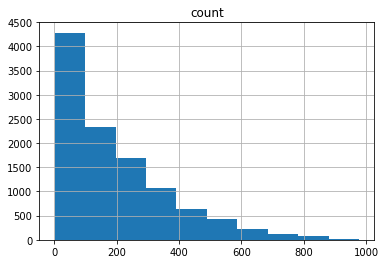

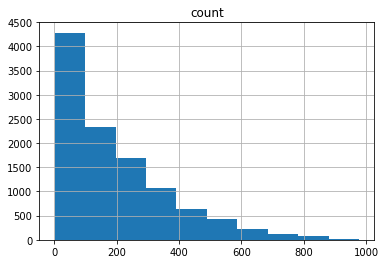

In [72]:
df.hist("count")
plt.show()

In [80]:
df["count_log"] = df["count"].apply(math.log)

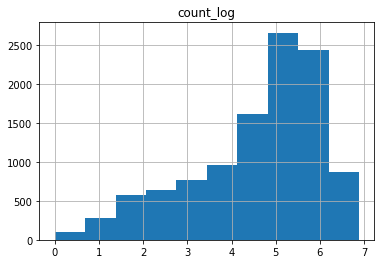

In [81]:
df.hist("count_log")
plt.show()

In [83]:
filename = '/codilime/data/train_processed_3.0.0_{}.p'.format(date.today())

train_final_log = train_final
train_final_log["y"] = [math.log(value) for value in train_final_log["y"]]

pickle.dump(train_final_log, open(filename, "wb"))